# Lab | Random variable distributions

Refer to the files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv dataset.

#### Instructions

1) Get the numerical variables from our dataset.

2) Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

3) Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os
import warnings

from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
df.head(10)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,Rural,Married,69,14,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2/24/11,Employed,F,55350,Suburban,Married,67,0,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize
7,CF85061,Arizona,7216.100311,No,Premium,Master,1/18/11,Unemployed,M,0,Urban,Single,101,0,68,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize
8,DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,14072,Suburban,Divorced,71,13,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize
9,BQ94931,Oregon,7388.178085,No,Extended,College,2/17/11,Employed,F,28812,Urban,Married,93,17,7,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize


In [3]:
df.columns = [df.columns[col_name].lower().replace(' ','_') for col_name in range(len(df.columns))]
df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [4]:
df.set_index('customer', inplace=True)
df.head(10)

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,Rural,Married,69,14,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
XZ87318,Oregon,5380.898636,Yes,Basic,College,2/24/11,Employed,F,55350,Suburban,Married,67,0,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize
CF85061,Arizona,7216.100311,No,Premium,Master,1/18/11,Unemployed,M,0,Urban,Single,101,0,68,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize
DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,14072,Suburban,Divorced,71,13,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize


#### Instructions

1) Get the numerical variables from our dataset.

In [6]:
df_num = df.select_dtypes(np.number)
df_num.head(10)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer,,,,,,,,
BU79786,2763.519279,56274,69,32,5,0,1,384.811147
QZ44356,6979.535903,0,94,13,42,0,8,1131.464935
AI49188,12887.431650,48767,108,18,38,0,2,566.472247
WW63253,7645.861827,0,106,18,65,0,7,529.881344
HB64268,2813.692575,43836,73,12,44,0,1,138.130879
OC83172,8256.297800,62902,69,14,94,0,2,159.383042
XZ87318,5380.898636,55350,67,0,13,0,9,321.600000
CF85061,7216.100311,0,101,0,68,0,4,363.029680
DY87989,24127.504020,14072,71,13,3,0,2,511.200000


#### Instructions

2) Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

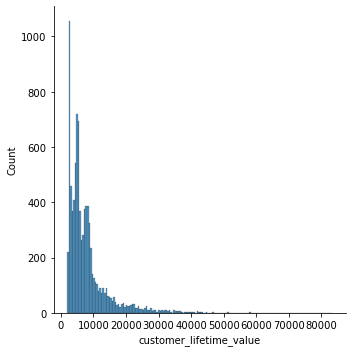

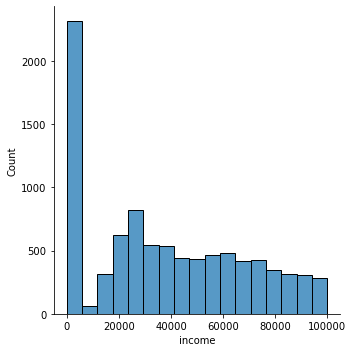

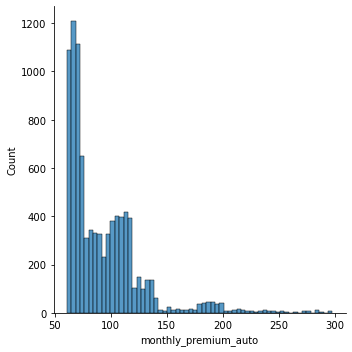

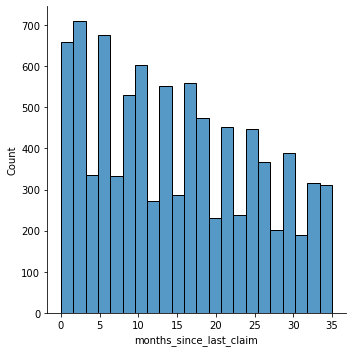

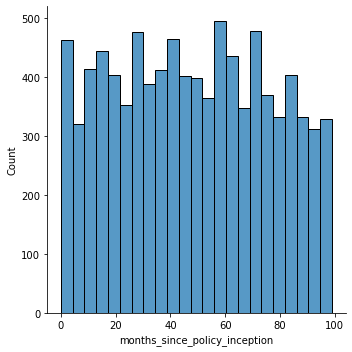

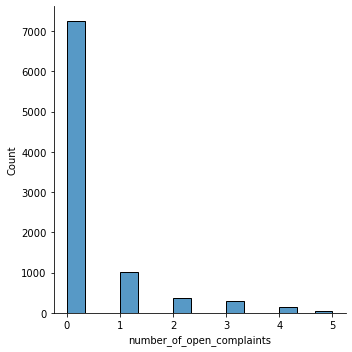

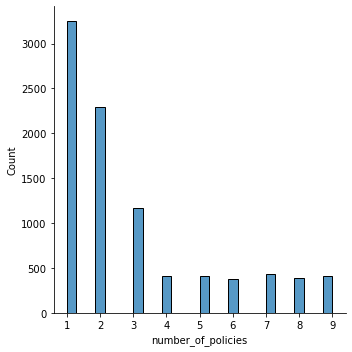

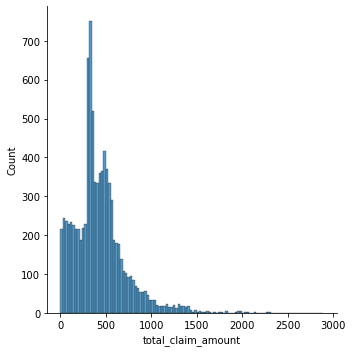

In [7]:
for column in df_num.columns:
    sns.displot(df_num[column])
    plt.show()

#### Instructions

3) Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

### BoxCox transformation

In [10]:
# Normalize (numerical)

def boxcox_transform(df):
    numeric_cols = df.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        # since i know any columns should take negative numbers, to avoid -inf in df
        df[column] = np.where(df[column]<=0, np.NAN, df[column])
        df[column] = df[column].fillna(df[column].mean())
        transformed_data, ci = stats.boxcox(df[column]) 
        df[column] = transformed_data
        _ci[column] = [ci] 
    return df, _ci

df_num_bc, _ci = boxcox_transform(df_num.copy()) #IMPORTANT: use copy method
df_num_bc.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer,,,,,,,,
BU79786,2.703839,1247.937066,0.685347,10.876059,3.017887,0.648045,0.000000,33.035752
QZ44356,2.754926,1167.961720,0.685871,5.808248,18.780377,0.648045,1.424359,56.357614
AI49188,2.780772,1144.063081,0.686039,7.347815,17.389171,0.648045,0.607328,40.071789
WW63253,2.759125,1167.961720,0.686018,7.347815,26.160800,0.648045,1.363462,38.763252
HB64268,2.704995,1072.375744,0.685461,5.471294,19.461641,0.648045,0.000000,19.560154


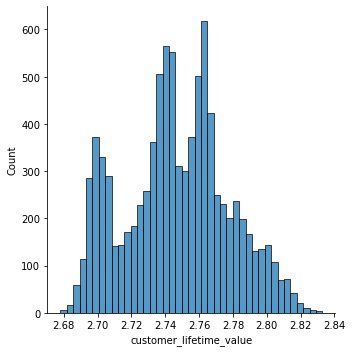

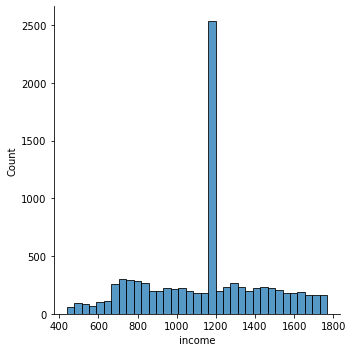

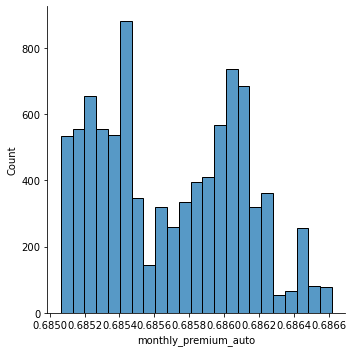

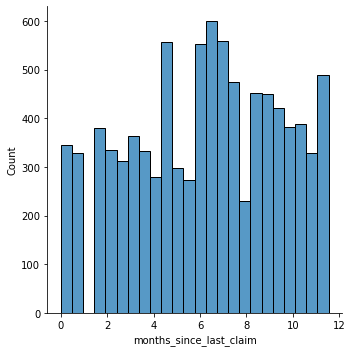

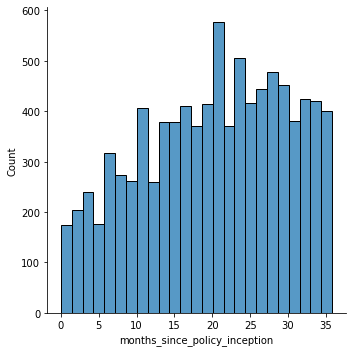

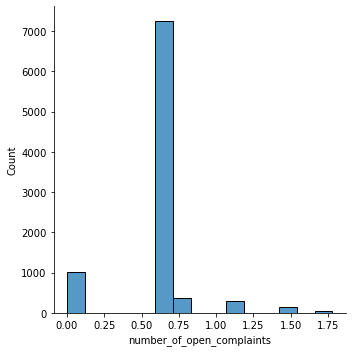

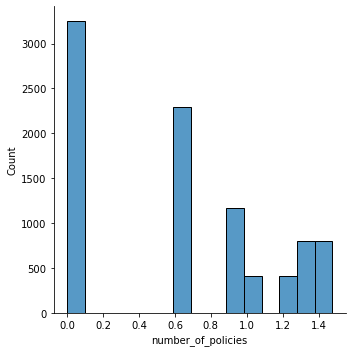

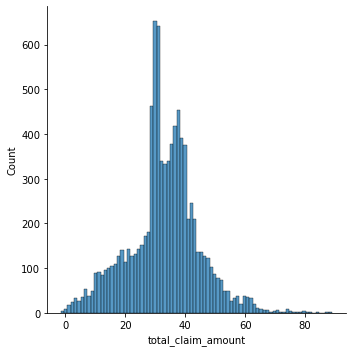

In [11]:
for column in df_num_bc.columns:
    sns.displot(df_num_bc[column])
    plt.show()

### Normalizer

In [14]:
nor = Normalizer()

df_num_nor = pd.DataFrame( # convert np array returned by scaler.transform() into a pd dataframe
    data=nor.transform(df_num), # use scaler to put all numerical values between 0 (X_train min) and 1 (X_train max)
    index=df_num.index, columns=df_num.columns) # set index and column names of the new dataframe
df_num_nor.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer,,,,,,,,
BU79786,0.049048,0.998772,0.001225,0.000568,0.000089,0.0,0.000018,0.006830
QZ44356,0.987006,0.000000,0.013293,0.001838,0.005939,0.0,0.001131,0.160005
AI49188,0.255478,0.966747,0.002141,0.000357,0.000753,0.0,0.000040,0.011230
WW63253,0.997473,0.000000,0.013829,0.002348,0.008480,0.0,0.000913,0.069128
HB64268,0.064055,0.997940,0.001662,0.000273,0.001002,0.0,0.000023,0.003145


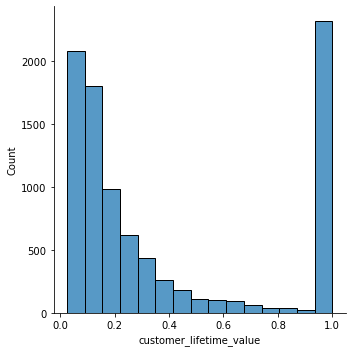

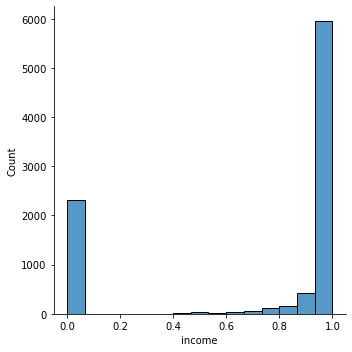

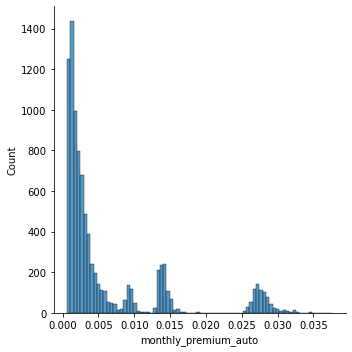

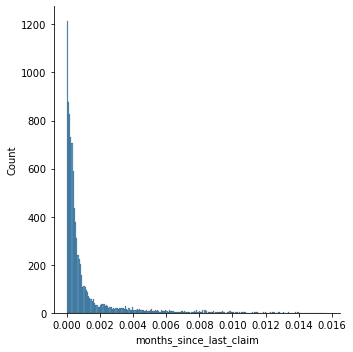

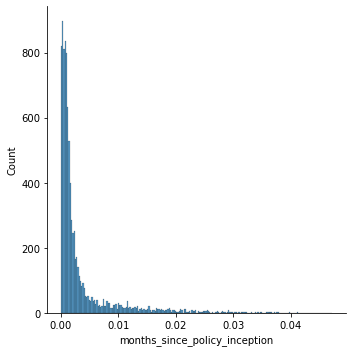

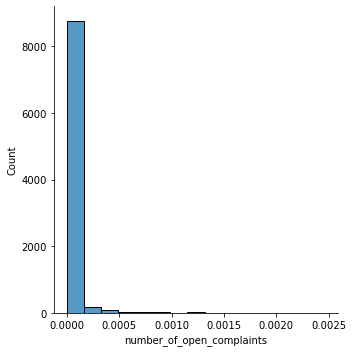

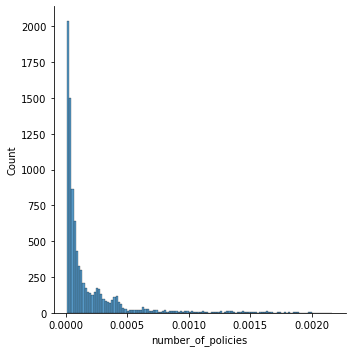

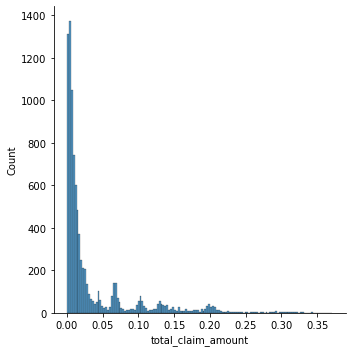

In [15]:
for column in df_num_nor.columns:
    sns.displot(df_num_nor[column])
    plt.show()

## MinMaxScaler

In [19]:
mms = MinMaxScaler().fit(df_num)

df_num_mms = pd.DataFrame( # convert np array returned by scaler.transform() into a pd dataframe
    data=mms.transform(df_num), # use scaler to put all numerical values between 0 (X_train min) and 1 (X_train max)
    index=df_num.index, columns=df_num.columns) # set index and column names of the new dataframe
df_num_mms.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer,,,,,,,,
BU79786,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0.132974
QZ44356,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.391051
AI49188,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.195764
WW63253,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.183117
HB64268,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0.047710


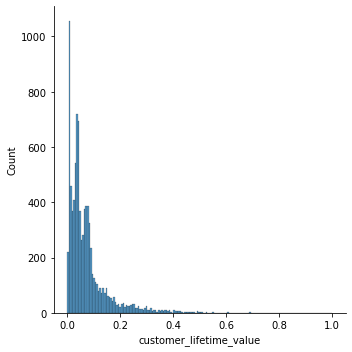

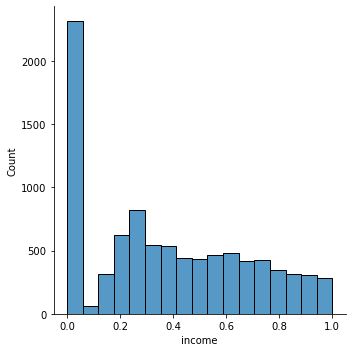

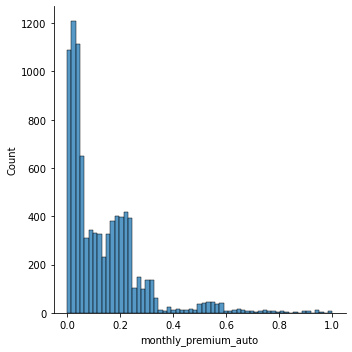

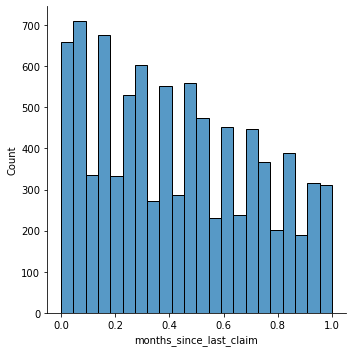

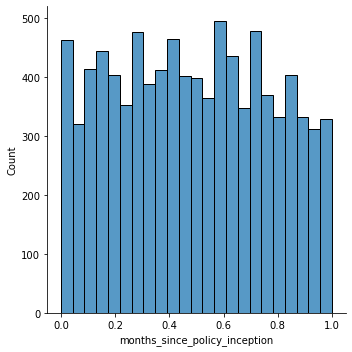

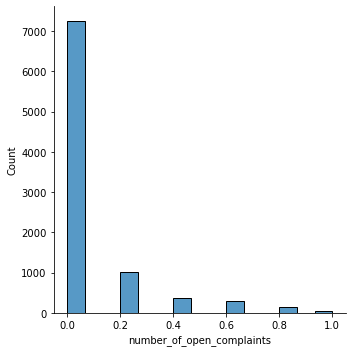

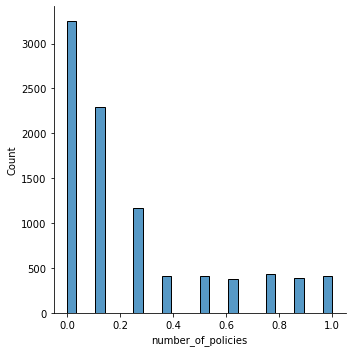

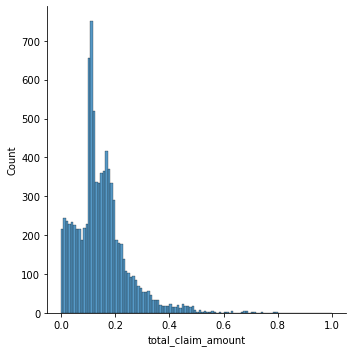

In [20]:
for column in df_num_mms.columns:
    sns.displot(df_num_mms[column])
    plt.show()

## StandardScaler

In [23]:
std = StandardScaler().fit(df_num)

df_num_std = pd.DataFrame( # convert np array returned by scaler.transform() into a pd dataframe
    data=std.transform(df_num), # use scaler to put all numerical values between 0 (X_train min) and 1 (X_train max)
    index=df_num.index, columns=df_num.columns) # set index and column names of the new dataframe
df_num_std.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer,,,,,,,,
BU79786,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.42225,-0.822648,-0.169640
QZ44356,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.42225,2.106160,2.400737
AI49188,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.42225,-0.404247,0.455734
WW63253,-0.052263,-1.239617,0.371467,0.288205,0.606907,-0.42225,1.687759,0.329769
HB64268,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.42225,-0.822648,-1.018843


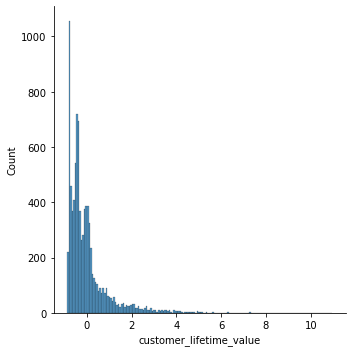

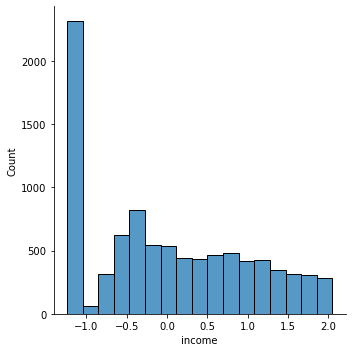

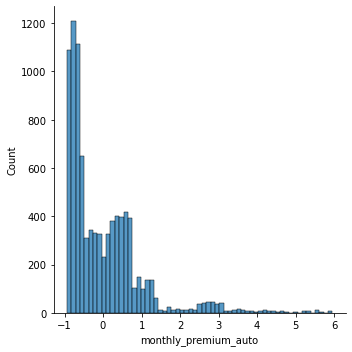

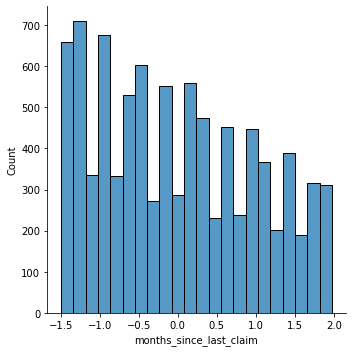

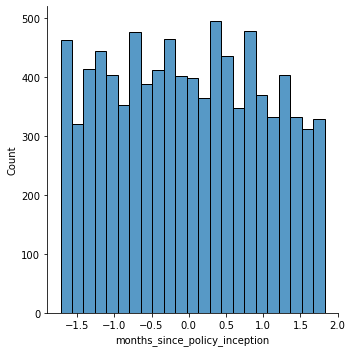

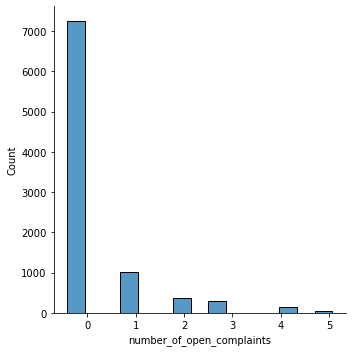

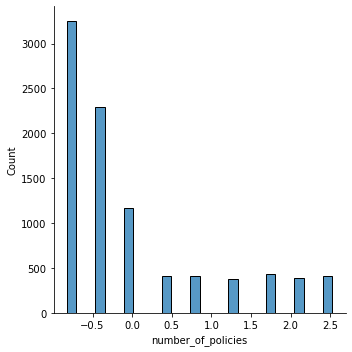

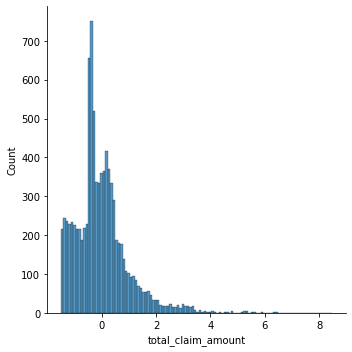

In [24]:
for column in df_num_std.columns:
    sns.displot(df_num_std[column])
    plt.show()